In [2]:
# Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [7]:
 df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Drop CustomerId and Surname as they don't contribute to prediction
df.drop(columns=['CustomerId', 'Surname'], inplace=True)

In [9]:
# 🔹 Encoding categorical variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [10]:
print(df.isnull().sum())

CreditScore          0
Age                  0
Tenure               0
Balance              0
Num Of Products      0
Has Credit Card      0
Is Active Member     0
Estimated Salary     0
Churn                0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64


In [11]:
# 🔹 Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
# 🔹 Splitting the data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [14]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [15]:
# 🔹 Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [16]:
# 🔹 Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [17]:
# 🔹 Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# 🔹 Churn Distribution
print("\n--- Churn Distribution ---\n")
print(df['Churn'].value_counts(normalize=True))


--- Churn Distribution ---

Churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [19]:
# 🔹 Correlation Matrix
corr_matrix = df.corr()
print("\n--- Correlation Matrix ---\n")
print(corr_matrix)


--- Correlation Matrix ---

                   CreditScore       Age    Tenure   Balance  Num Of Products  \
CreditScore           1.000000 -0.003965  0.000842  0.006268         0.012238   
Age                  -0.003965  1.000000 -0.009997  0.028308        -0.030680   
Tenure                0.000842 -0.009997  1.000000 -0.012254         0.013444   
Balance               0.006268  0.028308 -0.012254  1.000000        -0.304180   
Num Of Products       0.012238 -0.030680  0.013444 -0.304180         1.000000   
Has Credit Card      -0.005458 -0.011721  0.022583 -0.014858         0.003183   
Is Active Member      0.025651  0.085472 -0.028362 -0.010084         0.009612   
Estimated Salary     -0.001384 -0.007201  0.007784  0.012797         0.014204   
Churn                -0.027094  0.285323 -0.014001  0.118533        -0.047820   
Geography_Germany     0.005538  0.046897 -0.000567  0.401110        -0.010419   
Geography_Spain       0.004780 -0.001685  0.003868 -0.134892         0.009039   

In [20]:
# 🔹 Display value counts of categorical variables
print("\n--- Categorical Value Counts ---\n")
print(df['Has Credit Card'].value_counts())
print(df['Is Active Member'].value_counts())


--- Categorical Value Counts ---

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64
Is Active Member
1    5151
0    4849
Name: count, dtype: int64


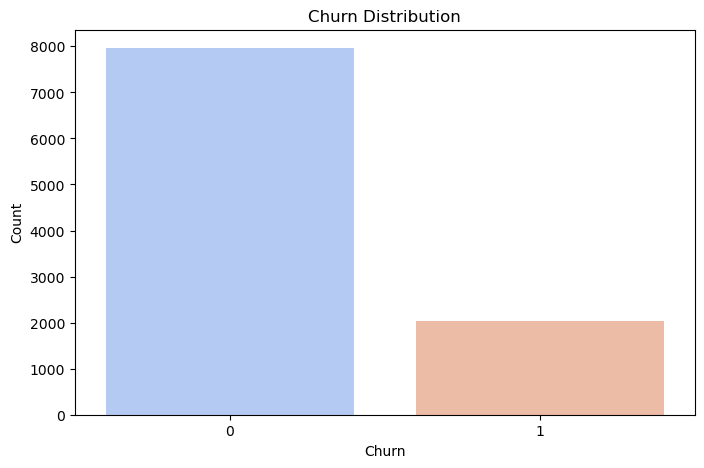

In [21]:
# 🔹 Churn Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

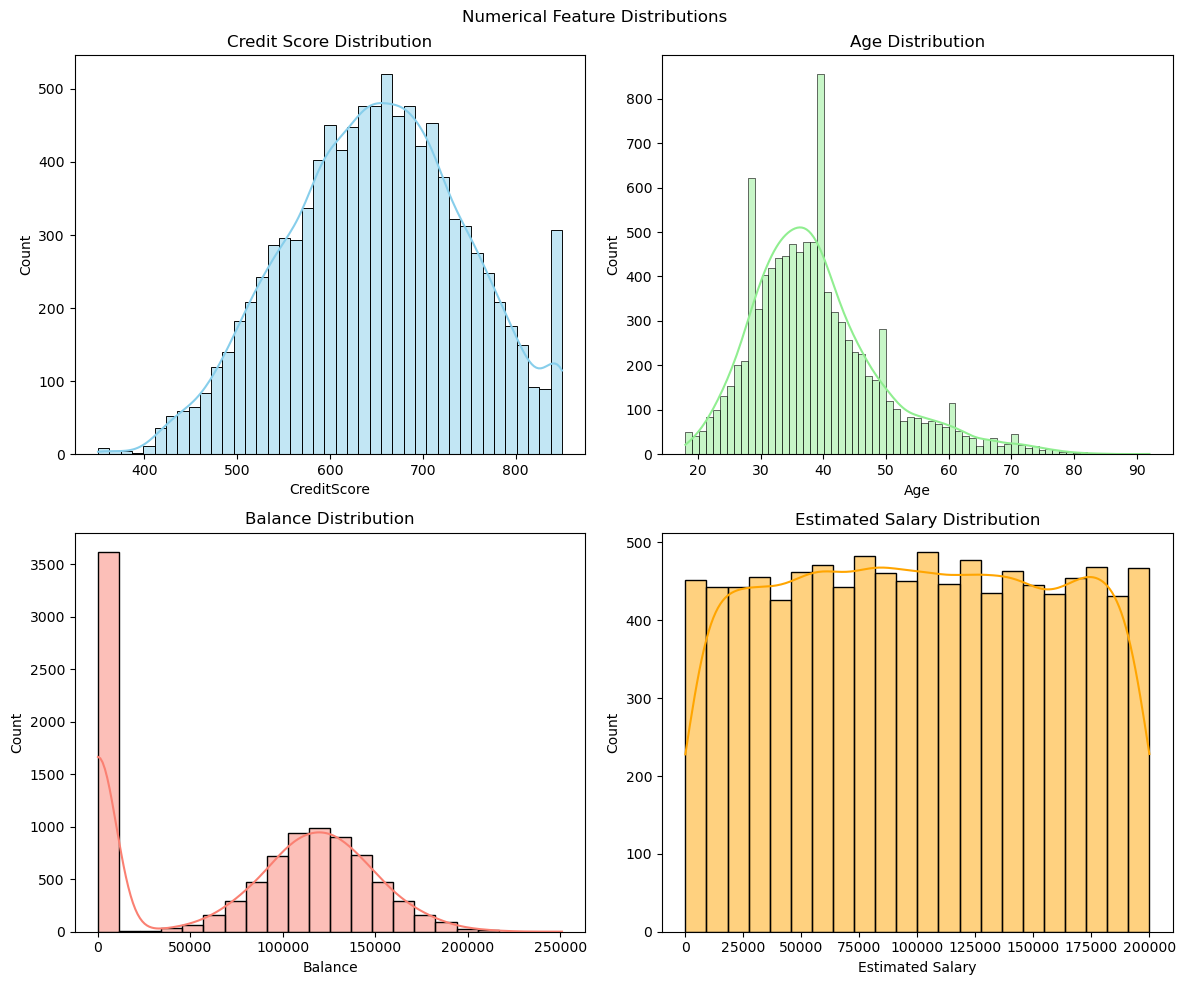

In [22]:
# 🔹 Numerical Feature Distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Numerical Feature Distributions')

sns.histplot(df['CreditScore'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Credit Score Distribution')

sns.histplot(df['Age'], kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Age Distribution')

sns.histplot(df['Balance'], kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Balance Distribution')

sns.histplot(df['Estimated Salary'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()


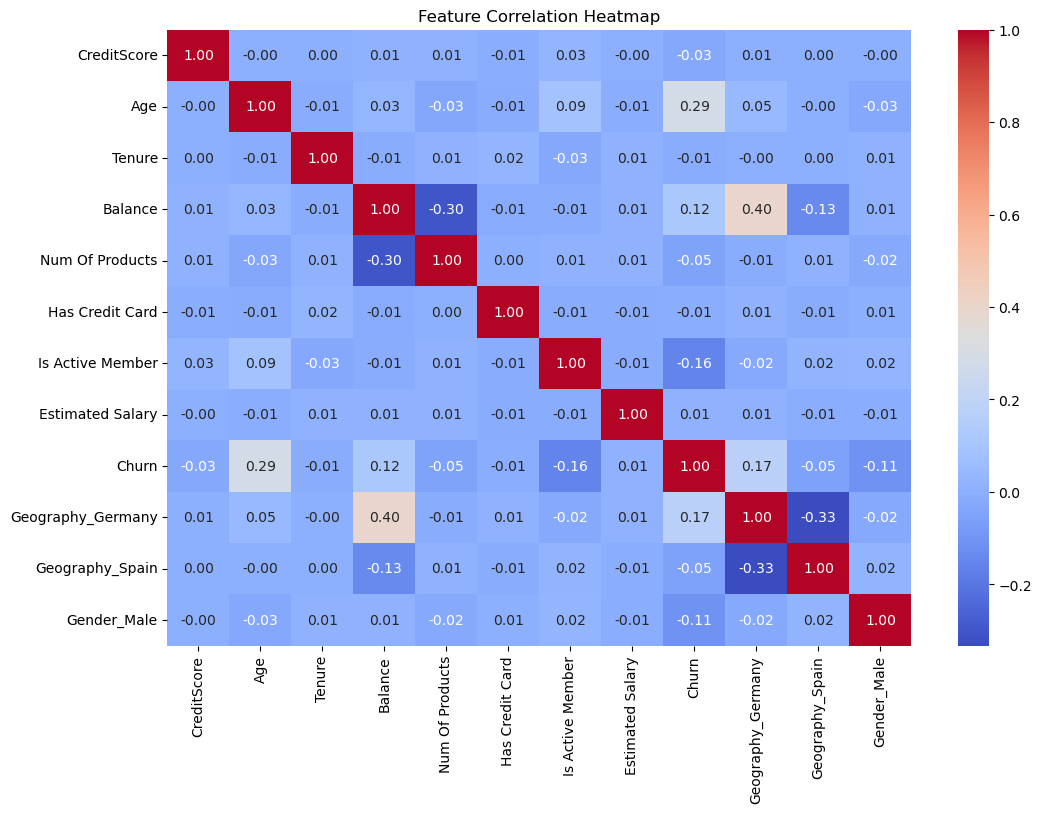

In [23]:
# 🔹 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 78.95 %


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.45 %


In [39]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.45 %


In [40]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.95 %


In [43]:
# importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.78      0.48      0.59       411

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



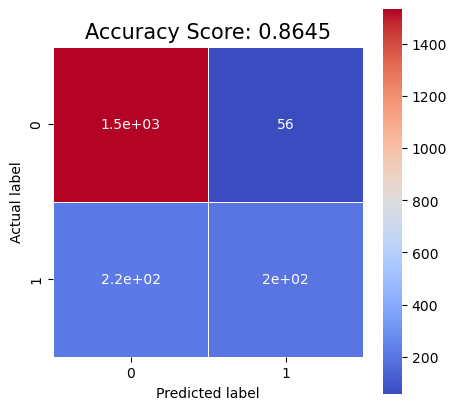

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='coolwarm')  # Changed color
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()


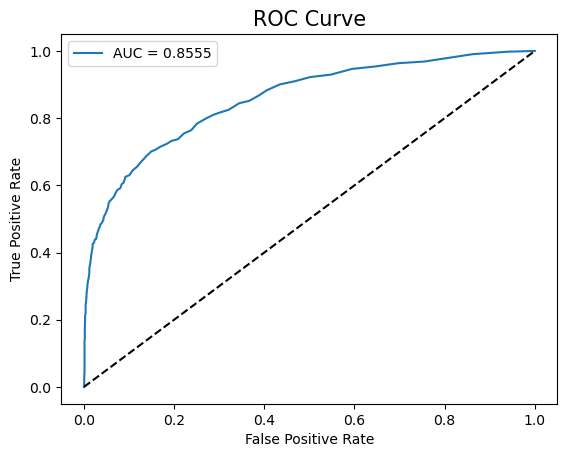

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [47]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1589
           1       0.73      0.51      0.60       411

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8595')

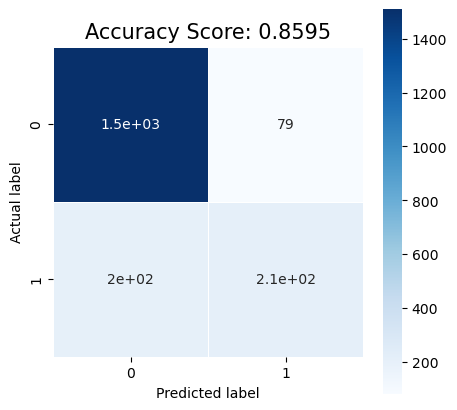

In [48]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


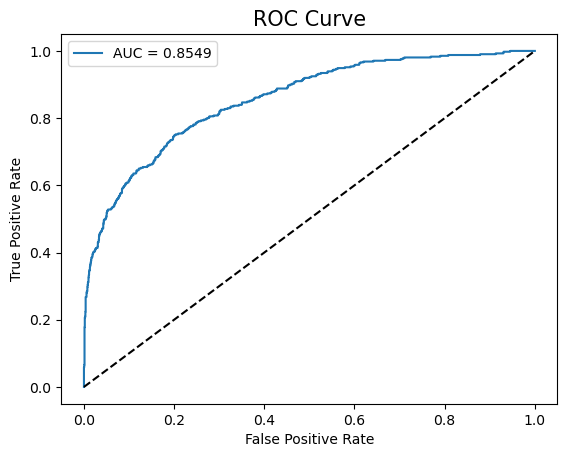

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()